In [1]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd:float
    target_currency:Literal["INR", "EUR"]
    total:float

In [3]:
def calculate_total_usd(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 85
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.92
    return state

def print_portfolio(state: PortfolioState) -> None:
    print(f"Amount in USD: {state['amount_usd']}")

def select_currency(state: PortfolioState) -> str:
    return state['target_currency']
    

In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)
builder.add_node("calculate_total_node", calculate_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calculate_total_node")
builder.add_conditional_edges("calculate_total_node", select_currency, {"INR": "convert_to_inr_node", "EUR": "convert_to_eur_node"})
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()

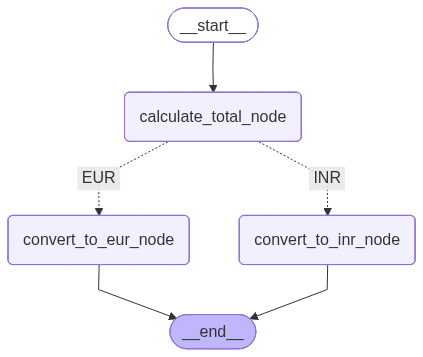

In [5]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [8]:
graph.invoke({"amount_usd": 100, "target_currency": "INR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'INR',
 'total': 9180.0}

In [9]:

graph.invoke({"amount_usd": 100, "target_currency": "EUR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'EUR',
 'total': 99.36}